In [ ]:
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install Augmentor

### Importing all the important libraries


In [41]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

import os
import shutil
import numpy as np
import glob
import random
import Augmentor

In [59]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Create a dataset


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# Where all dataset is there
data_dir = '/content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train'


In [ ]:


# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode='int',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=True,
)




Found 15617 files belonging to 10 classes.
Using 12494 files for training.


In [ ]:
# Load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode='int',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_width, img_height),
    batch_size=batch_size
)


Found 15617 files belonging to 10 classes.
Using 3123 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'augmented', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

['/content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis', '/content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma', '/content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma', '/content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma', '/content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus', '/content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis', '/content/drive/My Drive/AI/Upgrad/Mela

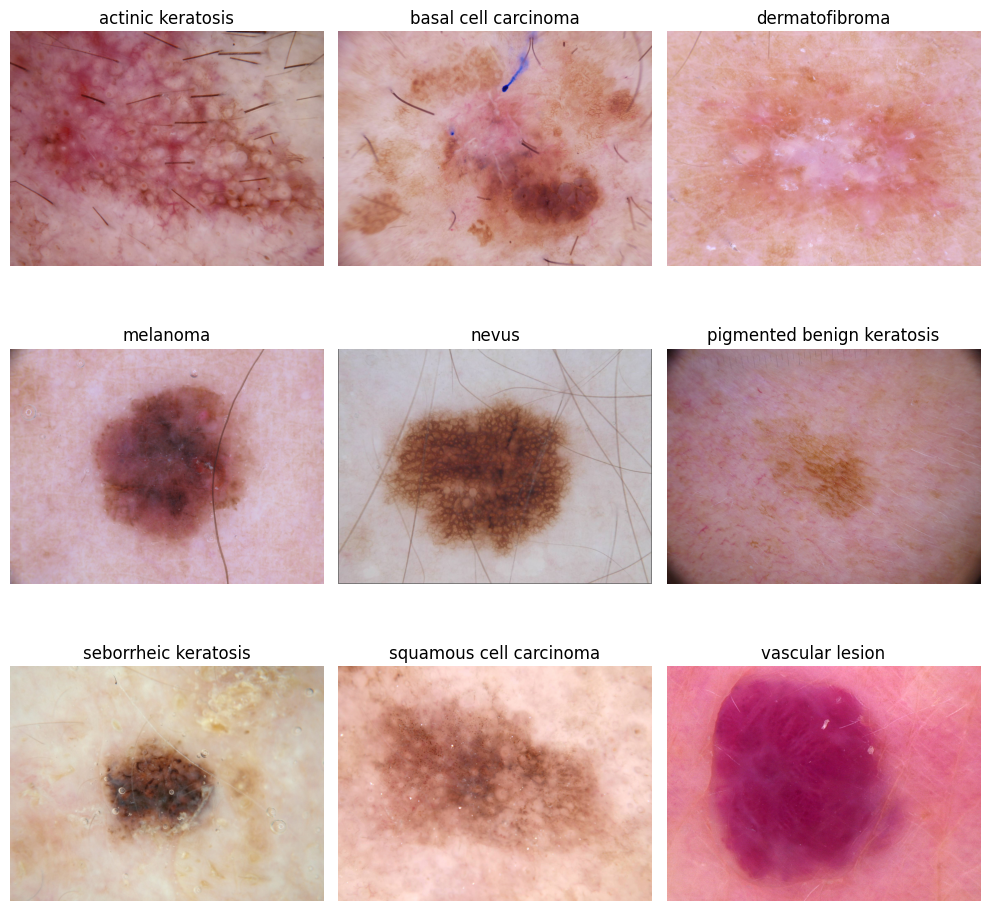

In [74]:
from PIL import Image


parent_dir = '/content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train'


subdirs = [os.path.join(parent_dir, subdir) for subdir in os.listdir(parent_dir) if (os.path.isdir(os.path.join(parent_dir, subdir)) and os.path.basename(subdir)!='augmented')]

print(subdirs)


images = []
titles = []


for subdir in subdirs:

    image_files = [f for f in os.listdir(subdir)]

    if image_files:
        img_path = os.path.join(subdir, image_files[0])
        img = Image.open(img_path)
        images.append(img)
        titles.append(os.path.basename(subdir))

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

In [ ]:
model = Sequential()

model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2,)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(9, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      31,719,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,817,801 (121.38 MB)

 Trainable params: 31,817,801 (121.38 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.2050 - loss: 2.4051 - val_accuracy: 0.3378 - val_loss: 1.9786
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.3236 - loss: 1.8369 - val_accuracy: 0.3624 - val_loss: 1.6782
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.3597 - loss: 1.7344 - val_accuracy: 0.3848 - val_loss: 1.6054
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.4135 - loss: 1.6033 - val_accuracy: 0.4541 - val_loss: 1.5419
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.4379 - loss: 1.5574 - val_accuracy: 0.4765 - val_loss: 1.4860
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.4650 - loss: 1.5069 - val_accuracy: 0.4832 - val_loss: 1.4406
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.4928 - loss: 1.4593 - val_accuracy: 0.4877 - val_loss: 1.4751
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.5016 - loss: 1.4308 - val_accuracy: 0.5078

### Visualizing training results

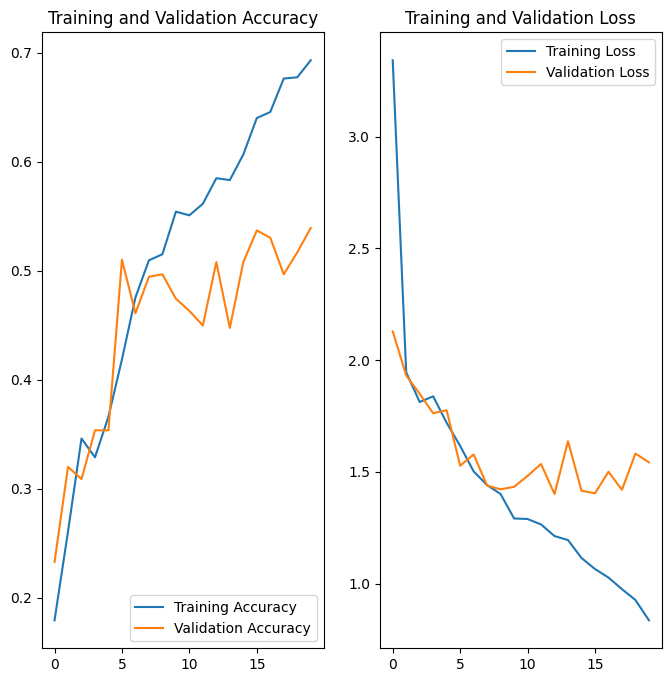

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings

The model seems to be underfitting as we are getting only 64 percent accuracy

This may be because traning data is very less , we can increase the traning data using image agumentation

### Agumentation

#### Visualizing the agumented images

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

img_path = '/content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0032206.jpg'

img = load_img(img_path)  # Load the image
x = img_to_array(img)  # Convert image to array
x = x.reshape((1,) + x.shape)  # Reshape to add a batch dimension

# Generate augmented images
augmented_images = []
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    augmented_images.append(img_to_array(batch[0]))  # Convert to array
    if i >= 9:  # Stop after generating 10 augmented images
        break

# Plot the original image and augmented images
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Plot the original image
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Plot the augmented images
for i, img_array in enumerate(augmented_images):
    axes[i].imshow(array_to_img(img_array))
    axes[i].set_title(f"Augmented {i + 1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Creating 5 times augumented traning data

In [ ]:

data_dir = '/content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train'


# Number of augmented images to generate per original image
num_augmentations = 5

# Iterate through subdirectories and then images
for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)

    images = os.listdir(subdir_path)
    # Iterate over each image in the input directory
    for img_name in images:
        img_path = os.path.join(subdir_path, img_name)
        img = load_img(img_path)  # Load the image
        x = img_to_array(img)  # Convert image to array
        x = x.reshape((1,) + x.shape)  # Reshape to add a batch dimension

        # Generate and save augmented images
        i = 0
        for batch in datagen.flow(x, batch_size=1):
            i += 1
            if i > num_augmentations:
                break  # Stop after generating the specified number of augmentations

            augmented_img = array_to_img(batch[0])
            augmented_img.save(os.path.join(subdir_path, f'augmented_{img_name.split(".")[0]}_{i}.jpg'))

print("Augmentation complete.")


### Todo:
### Create the model, compile and train the model

#### using ealier model which was complied above

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.6904 - loss: 0.8809 - val_accuracy: 0.5190 - val_loss: 1.5251
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.7156 - loss: 0.7951 - val_accuracy: 0.5324 - val_loss: 1.5601
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.7337 - loss: 0.7300 - val_accuracy: 0.4922 - val_loss: 1.6498
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.7387 - loss: 0.7536 - val_accuracy: 0.5190 - val_loss: 1.6624
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.7333 - loss: 0.7197 - val_accuracy: 0.5280 - val_loss: 1.6673
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.7450 - loss: 0.6668 - val_accuracy: 0.5123 - val_loss: 1.7416
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.7707 - loss: 0.6173 - val_accuracy: 0.5145 - val_loss: 1.7114
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.7871 - loss: 0.5896 - val_accuracy: 0.

### Visualizing training results

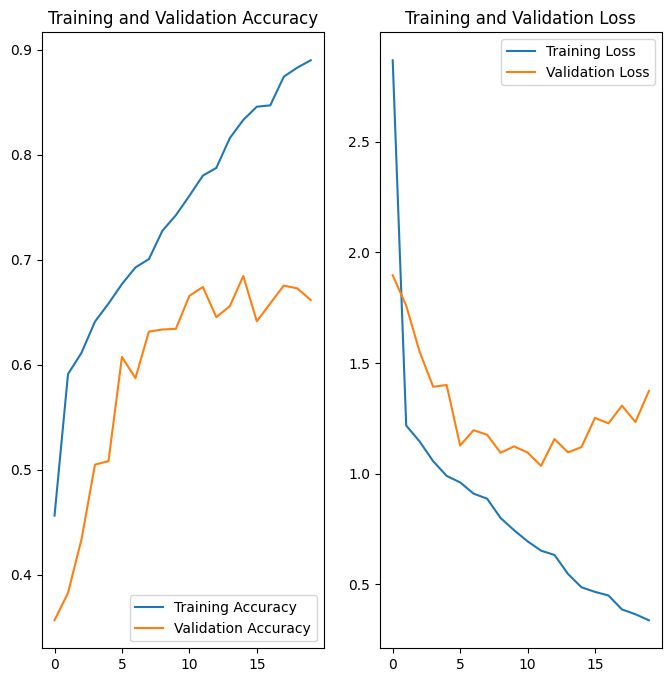

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings

Traning accuracy has improved , but the model seem to be overfitting
This may be due  class imbalace leading to poor generalization

####  Finding the distribution of classes in the training dataset.


In [ ]:
class_counts = {}
class_name_counts = {}
for images, labels in train_ds:
    # Iterate over labels in the batch
    for label in labels.numpy():
        class_name = class_map[label]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1
        # class_counts[label] = class_counts.get(label, 0) + 1

print(class_counts)

{'vascular lesion': 115, 'nevus': 277, 'pigmented benign keratosis': 370, 'melanoma': 352, 'dermatofibroma': 77, 'actinic keratosis': 92, 'basal cell carcinoma': 309, 'squamous cell carcinoma': 142, 'seborrheic keratosis': 58}


#### Findings - Data Imbalance:
#### 'seborrheic keratosis' has the least number of samples
#### 'pigmented benign keratosis': 370, 'melanoma': 352 seem to have  proportionate number of samples

#### Using 'Augmentor' to retify class imbalance

In [ ]:
!pip install Augmentor

In [ ]:

# Define the path to your training data
data_dir = '/content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

list_dir = os.listdir(data_dir)

augmented_data_dir = os.path.join(data_dir, 'augmented')
os.makedirs(augmented_data_dir, exist_ok=True)

# Create a dictionary to store Augmentor pipelines for each class
pipelines = {}

# Loop through each class directory
for class_name in list_dir:
    class_dir = os.path.join(data_dir, class_name)

    # Check if it's a directory
    if os.path.isdir(class_dir):
        # Create an Augmentor pipeline for this class
        output_path = os.path.join(augmented_data_dir, class_name)
        pipelines[class_name] = Augmentor.Pipeline(source_directory=class_dir, output_directory=output_path)

        # Define augmentation operations
        pipelines[class_name].rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        pipelines[class_name].zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
        pipelines[class_name].flip_left_right(probability=0.5)
        # Add more operations as needed

# # Get class balance
class_balance = class_counts
print(class_balance)

# Find the majority class and its count
majority_class = max(class_balance, key=class_balance.get)
majority_count = class_balance[majority_class]

# Augment minority classes to match the majority class
for class_name, pipeline in pipelines.items():
    if class_name != majority_class:
        num_samples = class_balance[class_name]
        num_augmentations = (majority_count*5) - num_samples  # Augment to match majority
        pipeline.sample(num_augmentations) # Sample augmented images

print("Augmentation complete.")

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/augmented/actinic keratosis.Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/augmented/basal cell carcinoma.Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/augmented/dermatofibroma.Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/AI/Upgrad/Melanoma_Assignment_CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/augmented/melanoma.Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/AI/Up

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C1FFBFD6D10>: 100%|██████████| 1758/1758 [00:22<00:00, 77.34 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C201C0C5900>: 100%|██████████| 1541/1541 [00:19<00:00, 80.47 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C201C073460>: 100%|██████████| 1773/1773 [00:22<00:00, 78.00 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C201DFFB970>: 100%|██████████| 1498/1498 [01:06<00:00, 22.46 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=962x676 at 0x7C201C0C4A60>: 100%|██████████| 1573/1573 [01:08<00:00, 23.08 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C201DF82320>: 100%|██████████| 1792/1792 [00:40<00:00, 44.64 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C201DF49E70>: 100%|██████████| 1708/1708 [00:20<00:00, 81.80 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0

Augmentation complete.


#### Create a training and validation datasets

In [50]:
import tensorflow as tf
import os


augmented_data_dir = os.path.join(data_dir, 'augmented')
augmented_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    augmented_data_dir,
    label_mode='int',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=True,
)

augmented_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    augmented_data_dir,
    label_mode='int',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_width, img_height),
    batch_size=batch_size
)



# combined_ds = train_ds.concatenate(augmented_ds)


Found 13378 files belonging to 9 classes.
Using 10703 files for training.
Found 13378 files belonging to 9 classes.
Using 2675 files for validation.


#### Create model

In [52]:
#somewhat stable newtry
model = Sequential()

model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

### Compile Model

In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 22, 22, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 456,521 (1.74 MB)

 Trainable params: 456,521 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

#### Train Model

In [55]:
#91 , 62
epochs = 30
history = model.fit(
  augmented_train_ds,
  validation_data=augmented_val_ds,
  epochs=epochs
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.1790 - loss: 1.9825 - val_accuracy: 0.2864 - val_loss: 1.6894
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.2962 - loss: 1.6529 - val_accuracy: 0.4116 - val_loss: 1.4392
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.3894 - loss: 1.4930 - val_accuracy: 0.4105 - val_loss: 1.4229
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 24s 71ms/step - accuracy: 0.4210 - loss: 1.4226 - val_accuracy: 0.4449 - val_loss: 1.3605
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 24s 71ms/step - accuracy: 0.4339 - loss: 1.3530 - val_accuracy: 0.4355 - val_loss: 1.3579
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.4655 - loss: 1.3034 - val_accuracy: 0.4748 - val_loss: 1.2990
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.4845 - loss: 1.2594 - val_accuracy: 0.4579 - val_loss: 1.3149
Epoch 8/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.4903 - loss: 1.2277 - 

#### Visualize the model results

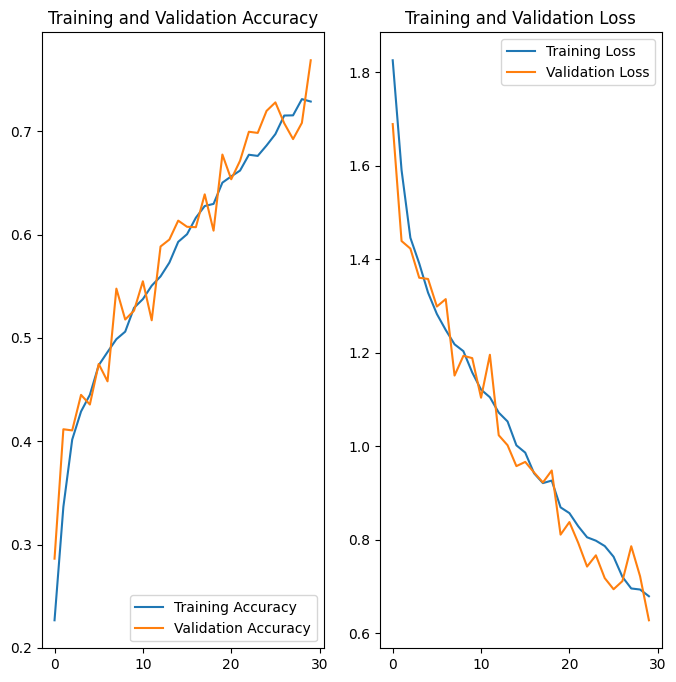

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Trying 50 epochs as accuracy still seem to be improving after 30 epochs

In [82]:
#91 , 62
epochs = 50
history = model.fit(
  augmented_train_ds,
  validation_data=augmented_val_ds,
  epochs=epochs
)

Epoch 1/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.8175 - loss: 0.4686 - val_accuracy: 0.7776 - val_loss: 0.5839
Epoch 2/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.8094 - loss: 0.4899 - val_accuracy: 0.8135 - val_loss: 0.4998
Epoch 3/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.8262 - loss: 0.4525 - val_accuracy: 0.8213 - val_loss: 0.5068
Epoch 4/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.8170 - loss: 0.4708 - val_accuracy: 0.8120 - val_loss: 0.4777
Epoch 5/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.8271 - loss: 0.4641 - val_accuracy: 0.7832 - val_loss: 0.6203
Epoch 6/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.8387 - loss: 0.4250 - val_accuracy: 0.7809 - val_loss: 0.5903
Epoch 7/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.8284 - loss: 0.4421 - val_accuracy: 0.8385 - val_loss: 0.4235
Epoch 8/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.8379 - loss: 0.4242 - 

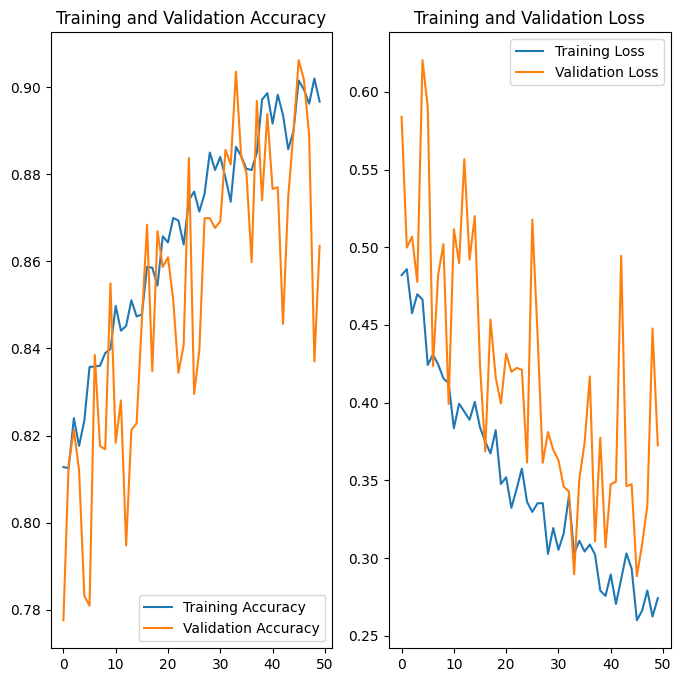

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### We were able to hadle undrfitting by increating the traning data, and over fitting by handling class imbalance

In [85]:

print(tf.__version__)


2.17.1
